![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# CIFAR 10 (DATOS ONE-HOT-ENCODING)

## Guardar entrenamientos

In [ ]:
BASE_FOLDER = "C:/Users/Herre/Desktop/Deeplearning/ENTRENAMIENTOS"

## -Cargando el conjunto de datos

In [1]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

[INFO]: Loading CIFAR-10 data...


In [2]:
print(trainX[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [3]:
print(trainY[0])

[6]


## -Inspeccionando el conjunto de datos

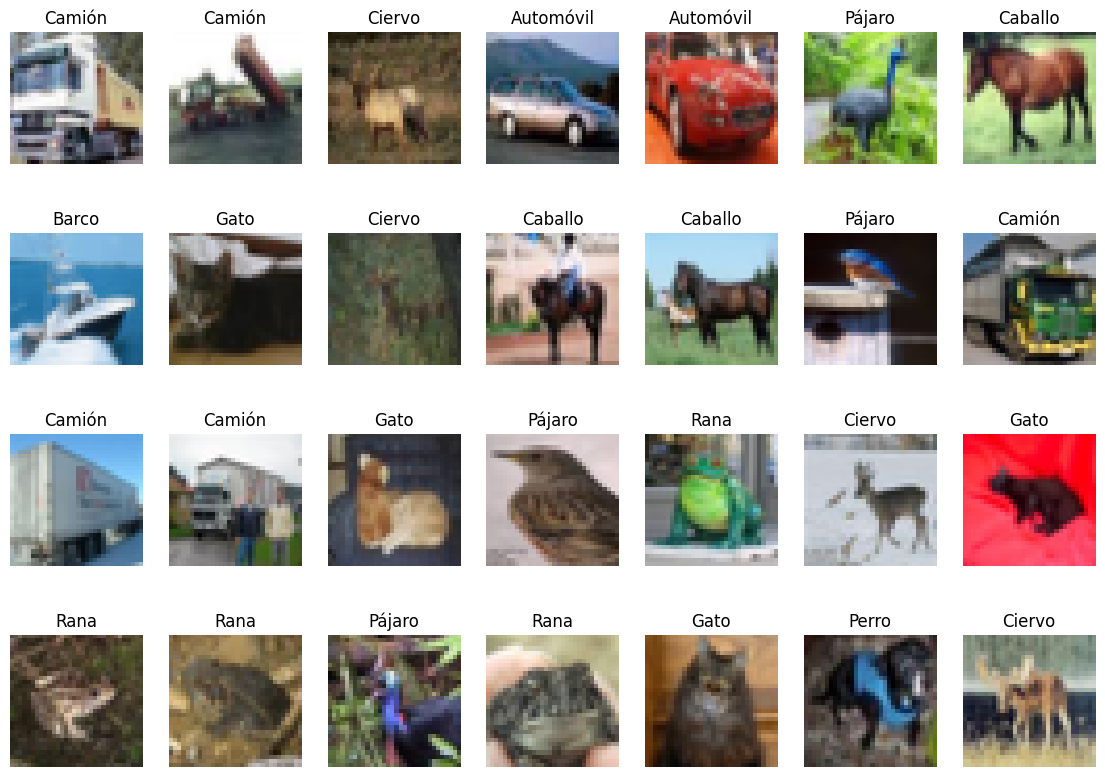

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure (figsize=(14,10))
for n in range(1,29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

## -Acondicionando el conjunto de datos

In [5]:
#PREPROCESAMIENTO DE LOS DATOS
trainX = trainX / 255.0
testX = testX / 255.0

#Convertir a One-Hot-Encoding

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY.shape)

(50000, 10)


## -Creando la topología de red neuronal y entrenándola: MLP (Multilayer preceptor)

In [ ]:
#Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

#Arquitectura de red
#Definimos el modo API Sequential
model = Sequential()


model.add(Flatten())
model.add(Dense(2048, input_shape=(3072,), activation="relu")) # input_shape = 32 x 32 x 3
#model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
#model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en one hot encoding

# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")

In [ ]:
# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32)

# Obtenemos el report
#print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas One-Hot-Encoding

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## -Creando la topología de red neuronal y entrenándola: CNN

In [6]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])) # shape=(32,32,3) ####Esto se adapta perfectamente a la dimensionalidad.

#######Estamos usando la API funcional, no es la API Secuencial de antes.

# BASE MODEL

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)


#TOP MODEL

#Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)


#Clasificador softmax ##Esta es la capa de salida
predictions = Dense(10, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model_cnn = Model(inputs=inputs, outputs=predictions)

In [7]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=50, verbose=1)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
#drive.mount('/content/drive')

# Almacenamos el modelo empleando la función mdoel.save de Keras
#model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(testX, batch_size=128)


#Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas One-Hot-Encoding

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 164ms/step - accuracy: 0.2764 - loss: 2.5549 - val_accuracy: 0.1851 - val_loss: 2.8269
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 166ms/step - accuracy: 0.4511 - loss: 1.6439 - val_accuracy: 0.3435 - val_loss: 2.1236
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.5217 - loss: 1.3670 - val_accuracy: 0.5754 - val_loss: 1.2209
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 187s 599ms/step - accuracy: 0.5603 - loss: 1.2272 - val_accuracy: 0.5705 - val_loss: 1.2668
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step - accuracy: 0.5977 - loss: 1.1255 - val_accuracy: 0.5815 - val_loss: 1.1738
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 166ms/step - accuracy: 0.6280 - loss: 1.0541 - val_accuracy: 0.6113 - val_loss: 1.1261
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.6374 - loss: 1.0067 - val_accuracy: 0.6544 - val_loss: 0.9655
Epoch 8/50
313/313 ━━

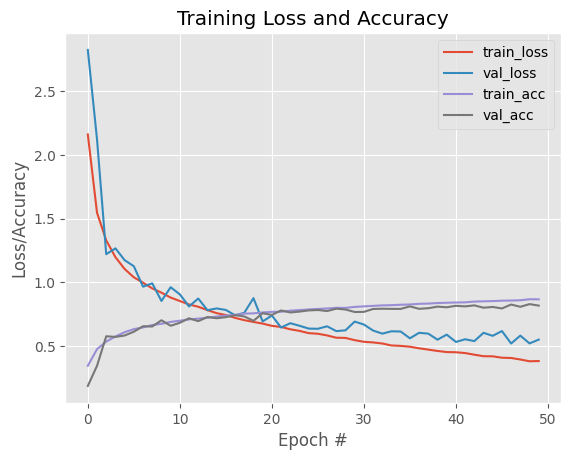

In [8]:
# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()